In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
R = 1.
bubbles = Bubbles([Bubble(Point3(0., 0., 0.), R)])

Bubbles(Bubble[Bubble(Point(0.0, 0.0, 0.0), 1.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / R
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)


norm (generic function with 23 methods)

# Computing Analytically

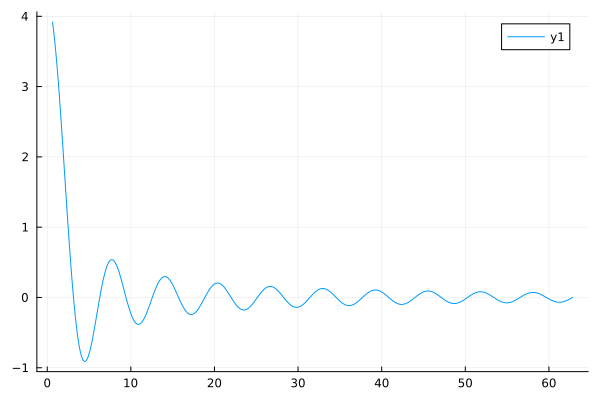

In [4]:
ΔV = 1.
analytic_T_ii = @. ((ΔV * 4π / 3) * (R ^ 3)) * sin(ks * R) / (ks * R)  
plot(ks, analytic_T_ii)

# Computing Numerically

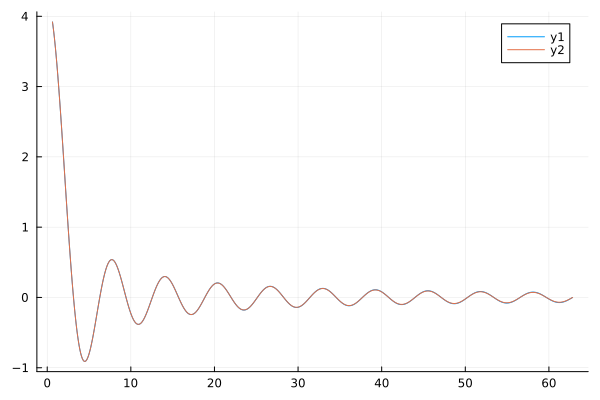

In [5]:
tensor_directions = [:trace, (:x, :x), (:y, :y), (:z, :z), (:x, :y), (:x, :z), (:y, :z)]
surface_integral = EnvelopeApproximation.StressEnergyTensor.surface_integral
numerical_T_ii = surface_integral(k_vecs, bubbles, tensor_directions, 100, 100, ΔV)
plot(ks, [numerical_T_ii[:, 1] .|> real, analytic_T_ii])

# Study Degree of Realness 

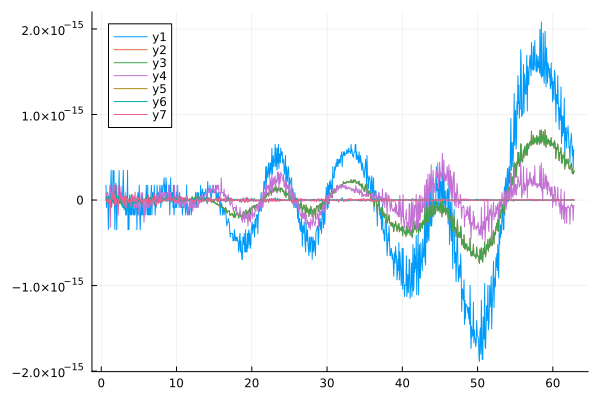

In [6]:
plot(ks, numerical_T_ii .|> imag)

# Study tensor directions

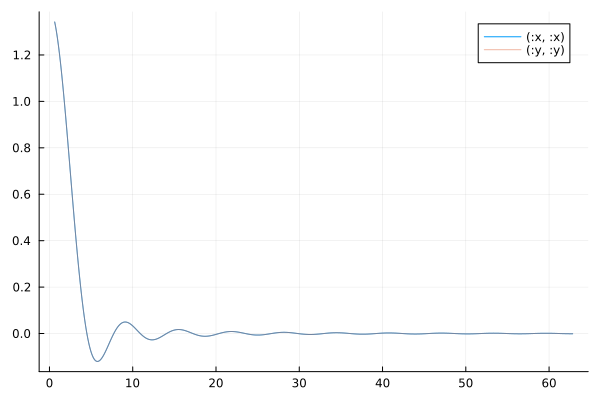

In [7]:
plot(ks, numerical_T_ii[:, 2] .|> real, label="(:x, :x)")
plot!(ks, numerical_T_ii[:, 3] .|> real, label="(:y, :y)", alpha=0.5)

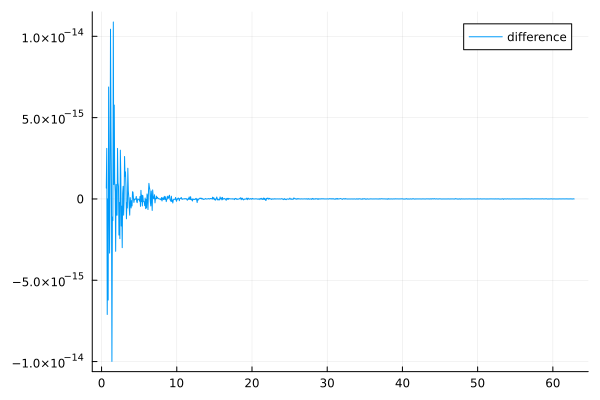

In [8]:
plot(ks, (numerical_T_ii[:, 2] .|> real) - (numerical_T_ii[:, 3] .|> real), label="difference")


## Z, Z

In [9]:
analytic_zz_integral = @.(8/9*(3*π*R*ks*cos(R*ks) - (3*π - π*R^2*ks^2)*sin(R*ks))/ks^3)

1000-element Vector{Float64}:
 -0.07144643750071762
 -0.0858003242902976
 -0.10131204269685407
 -0.11792994433229252
 -0.13559867383626692
 -0.1542593473849852
 -0.17384974252634375
 -0.19430449871844116
 -0.21555532791354357
 -0.2375312344969625
  ⋮
 -0.01949374867779715
 -0.016929908688793845
 -0.014305730430695916
 -0.011631473710200258
 -0.008917571374668172
 -0.006174588698365774
 -0.003413182337857023
 -0.0006440590156726371
  0.0021220659078918292

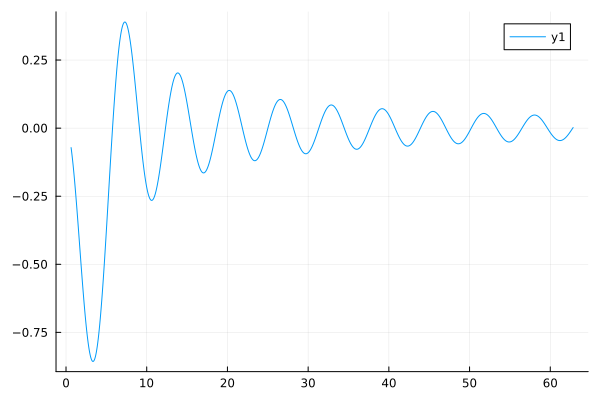

In [10]:
plot(ks, analytic_zz_integral)

In [13]:
numerical_zz_integral = (numerical_T_ii[:, 4] - (1. / 3) * numerical_T_ii[:, 1]) |> real

1000-element Vector{Float64}:
 -0.0715422121051037
 -0.08588748884424824
 -0.10138998136355637
 -0.11799809185629351
 -0.135656518753706
 -0.15430643496422158
 -0.17388567742355243
 -0.19432894733446937
 -0.21556802043966894
 -0.23753196663904297
  ⋮
 -0.02108575074223242
 -0.0183589592757471
 -0.015565918917878303
 -0.012717533352237268
 -0.00982490119225636
 -0.0068992728232072234
 -0.003952006732549154
 -0.0009945254977913316
  0.001961728397923589

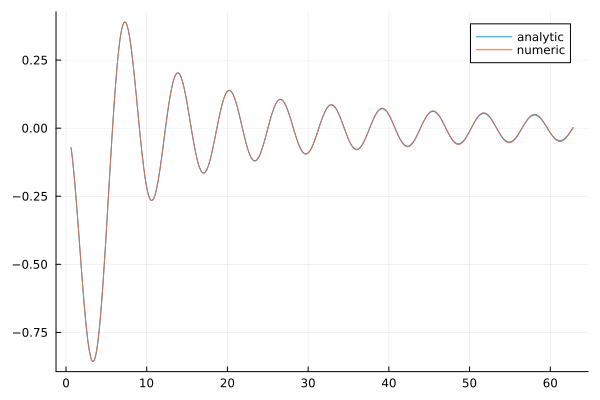

In [14]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numerical_zz_integral, label="numeric")

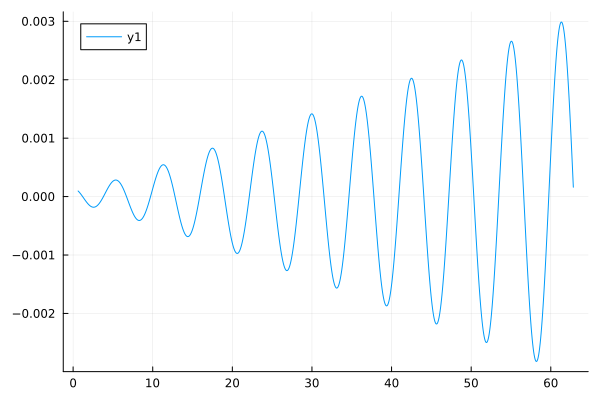

In [24]:
plot(ks, (analytic_zz_integral - numerical_zz_integral))